## Message Spam Detection

### Aim

This project aims to create a spam detection system, employing the Multinomial Naive Bayes algorithm to classify between spam and legitimate (ham) messages. Additionally, I'll be using performance metrics to assess the strength of the classification model.

### Dataset

The dataset contains two columns: 
1. class - ham or spam,
2. message - descprition or content of the message.        
Sourced - Kaggle

**The spam classifier uses the Multinomial Naive Bayes algorithm for text classification. It utilizes the CountVectorizer from scikit-learn to convert text data into numerical features for model training and prediction.**

## Import libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

### Load and display the dataset

In [16]:
df = pd.read_csv("spam (2).csv",encoding='ISO-8859-1')
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.describe(include='all')

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [19]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(inplace=True)
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

#### Inference : 
1. The dataset contains 5 fields and 5,572 records, all of which are of the object data type.
2. The dataset includes duplicate values, which have been deleted.
3. The fields named 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' are redundant and have therefore been dropped.

Data Visualization

Text(0, 0.5, 'Count')

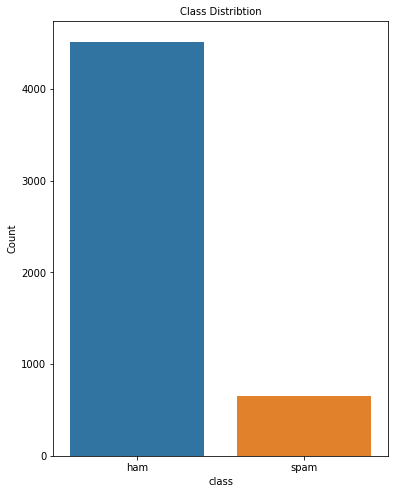

In [30]:
plt.figure(figsize=(6,8))
sns.countplot(data=df,x=df['class'])
plt.title('Class Distribtion',size = 10)
plt.ylabel("Count",size=10)

In [36]:
round(df['class'].value_counts()/len(df)*100)

ham     87.0
spam    13.0
Name: class, dtype: float64

The distribution of spam messages are found to be 13%, hence data is imbalance.

In [37]:
df['Target'] = df['class'].map({"ham":0,"spam":1})
df

,class,message,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [39]:
y = df['Target'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(df['message'], y, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3618,)
(3618,)
(1551,)
(1551,)


In [40]:
featurizer = CountVectorizer(decode_error='ignore')
X_train = featurizer.fit_transform(x_train)
X_test = featurizer.transform(x_test)

In [42]:
model = MultinomialNB()
model.fit(X_train,y_train)
print("train acc:",model.score(X_train,y_train))
print("test acc:",model.score(X_test,y_test))

train acc: 0.9941956882255389
test acc: 0.9819471308833011


In [44]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
print("Train F1:",f1_score(y_train,P_train))
print("Test F1",f1_score(y_test,P_test))

Train F1: 0.9772481040086674
Test F1 0.9226519337016574


In [45]:
Prob_train = model.predict_proba(X_train)[:,1]
Prob_test = model.predict_proba(X_test)[:,1]
print("train AUC:",roc_auc_score(y_train,Prob_train))
print("test AUC:",roc_auc_score(y_test,Prob_test))

train AUC: 0.9948491789298756
test AUC: 0.9670069692096124


In [47]:
cm = confusion_matrix(y_train,P_train)
cm

array([[3146,    8],
       [  13,  451]], dtype=int64)

In [50]:
cm_test = confusion_matrix(y_test,P_test)
cm_test

array([[1356,    6],
       [  22,  167]], dtype=int64)

In [48]:
def plot_cm(cm):
    classes = ['ham','spam']
    df_cm = pd.DataFrame(cm,index = classes, columns = classes)
    ax = sns.heatmap(df_cm,annot = True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

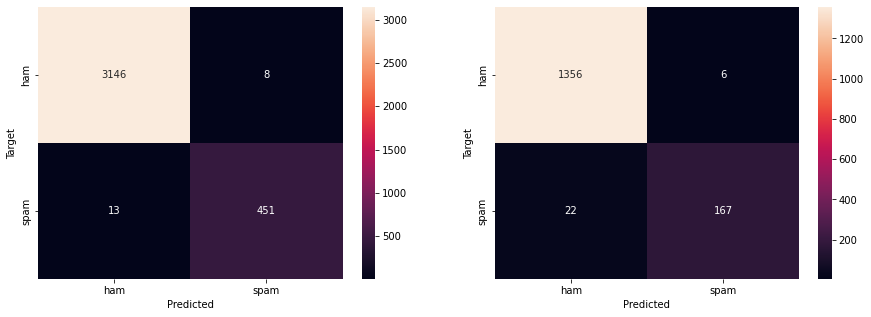

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_cm(cm)

plt.subplot(122)
plot_cm(cm_test)

In [58]:
X = featurizer.transform(df['message'])
df['predictions'] = model.predict(X)
sneaky_spam = df[(df['predictions'] == 0) & (df['Target'] == 1)]['message']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO
FreeMsg:Feelin kinda lnly h

In [59]:
not_actually_spam = df[(df['predictions'] == 1) & (df['Target'] == 0)]['message']
for msg in not_actually_spam:
    print(msg)

Yes:)from last week itself i'm taking live call.
Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Hi, Mobile no.  &lt;#&gt;  has added you in their contact list on www.fullonsms.com It s a great place to send free sms to people For more visit fullonsms.com
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
Dhoni have luck to win some big title.so we will win:)
